# Import the relevant libraries

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris ##
import os
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm

# Load csv file

In [3]:
df = pd.read_csv("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/labels.csv")
df = pd.DataFrame(df).reset_index()
df.columns = ['Index','Total']
del df['Index']
df["Index"] = df["Total"].str.split("\t").str[0]
df["img_name"] = df["Total"].str.split("\t").str[1]
df["gender"] = df["Total"].str.split("\t").str[2]
#df["smiling"] = df["Total"].str.split("\t").str[3]
del df['Total']
del df['Index']
df

,img_name,gender
0,0.jpg,-1
1,1.jpg,-1
2,2.jpg,1
3,3.jpg,-1
4,4.jpg,-1
...,...,...
4995,4995.jpg,1
4996,4996.jpg,1
4997,4997.jpg,1
4998,4998.jpg,1


Divide the dataset into female and male dataset.
And create the dataset for female and male which contains only the image name for moving the images into the other folder.

In [4]:
# Gender: -1(Female), 1(Male)

celeb_female = df.loc[df['gender'] == '-1']
female_img = celeb_female[['img_name']]
female_img.shape

(2500, 1)

In [5]:
celeb_male = df.loc[df['gender'] == '1']
male_img = celeb_male[['img_name']]
male_img.shape

(2500, 1)

In [6]:
import os
import glob
import shutil

import os.path
import fnmatch

Move images into sub-folder; female and male

In [7]:
#src = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img"
#dst = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train"

os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img"
src = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img"
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/female")
dst_female = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/female"

names_female = female_img.img_name.tolist()

for filename in os.listdir(src):
    for name in names_female:
        if name == filename:
             # move the file
            shutil.move(filename, dst_female)
            break

In [8]:
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/male")
dst_male = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/male"

names_male= male_img.img_name.tolist()

for filename in os.listdir(src):
    for name in names_male:
        if name == filename:
             # move the file
            shutil.move(filename, dst_male)
            break

## Split the data

In [9]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Create sub-folder

In [10]:
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train/female")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train/male")

#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/test")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/test/female")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/test/male")
#os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/validation")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/validation/female")
os.mkdir("/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/validation/male")


FileExistsError: [Errno 17] File exists: '/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train/female'

In [339]:
os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/female"

src_female = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/female"
src_male = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/male"

allFileNames_female = os.listdir(src_female)
np.random.shuffle(allFileNames_female)
train, valid, test = np.split(np.array(allFileNames_female),[int(len(allFileNames_female)*0.7), int(len(allFileNames_female)*0.85)])

train_female = [src_female+'/'+ name for name in train.tolist()]
val_female = [src_female+'/' + name for name in valid.tolist()]
test_female = [src_female+'/' + name for name in test.tolist()]

print('Total images: ', len(allFileNames_female))
print('Training: ', len(train))
print('Validation: ', len(valid))
print('Testing: ', len(test))

# Copy-pasting images
for name in train_female:
    shutil.move(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train/female")

for name in val_female:
    shutil.move(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/validation/female")

for name in test_female:
    shutil.move(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/test/female")

Total images:  2500
Training:  1750
Validation:  375
Testing:  375


In [341]:
os.chdir = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/male"

src_male = "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/img/male"

allFileNames_male = os.listdir(src_male)
np.random.shuffle(allFileNames_male)
train, valid, test = np.split(np.array(allFileNames_male),[int(len(allFileNames_male)*0.7), int(len(allFileNames_male)*0.85)])

train_male = [src_male+'/'+ name for name in train.tolist()]
val_male = [src_male+'/' + name for name in valid.tolist()]
test_male = [src_male+'/' + name for name in test.tolist()]

print('Total images: ', len(allFileNames_male))
print('Training: ', len(train))
print('Validation: ', len(valid))
print('Testing: ', len(test))

# Copy-pasting images
for name in train_male:
    shutil.move(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train/male")

for name in val_male:
    shutil.move(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/validation/male")

for name in test_male:
    shutil.move(name, "/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/test/male")

Total images:  2500
Training:  1750
Validation:  375
Testing:  375


## Modelling

In [11]:
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

from keras import models

Using TensorFlow backend.


In [3]:
# starting point 
model_gender= model.Sequential()

# Add first convolutional block
model_gender.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(128,128,3)))
model_gender.add(MaxPooling2D((2, 2), padding='same'))

# second block
model_gender.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_gender.add(MaxPooling2D((2, 2), padding='same'))
# third block
model_gender.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_gender.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
model_gender.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_gender.add(MaxPooling2D((2, 2), padding='same'))

# global average pooling
model_gender.add(GlobalAveragePooling2D())
# fully connected layer
model_gender.add(Dense(64, activation='relu'))
model_gender.add(BatchNormalization())
# make predictions
model_gender.add(Dense(2, activation='sigmoid'))


# Show a summary of the model. Check the number of trainable parameters
model_gender.summary()

NameError: name 'model' is not defined

In [50]:
# use early stopping to optimally terminate training through callbacks
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# save best model automatically
mc= ModelCheckpoint('/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/A1/model_gender.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

cb_list=[es,mc]


# compile model 
model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [51]:

from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [57]:
# set up data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# get batches of training images from the directory
train_generator = data_generator.flow_from_directory(
        '/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/train',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical')

# get batches of validation images from the directory
validation_generator = data_generator.flow_from_directory(
        '/Users/Hyunjee/Desktop/AMLS_19-20_SN16075203/Datasets/celeba/validation',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

history = model_gender.fit_generator(
        train_generator,
        epochs=13,
        steps_per_epoch=train_generator.samples // 32,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // 32,
        callbacks=cb_list)

Found 3500 images belonging to 2 classes.
Found 750 images belonging to 2 classes.
Epoch 1/13
109/109 [==============================] - 68s 626ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.6887 - val_accuracy: 0.8580

Epoch 00001: val_loss did not improve from 0.03482
Epoch 2/13
109/109 [==============================] - 66s 605ms/step - loss: 0.0480 - accuracy: 0.9808 - val_loss: 0.4000 - val_accuracy: 0.9046

Epoch 00002: val_loss did not improve from 0.03482
Epoch 3/13
109/109 [==============================] - 78s 718ms/step - loss: 0.0271 - accuracy: 0.9886 - val_loss: 0.7624 - val_accuracy: 0.9220

Epoch 00003: val_loss did not improve from 0.03482
Epoch 4/13
109/109 [==============================] - 56s 514ms/step - loss: 0.0365 - accuracy: 0.9869 - val_loss: 0.5193 - val_accuracy: 0.9116

Epoch 00004: val_loss did not improve from 0.03482
Epoch 5/13
109/109 [==============================] - 59s 542ms/step - loss: 0.0289 - accuracy: 0.9889 - val_loss: 0.3577 - val_a

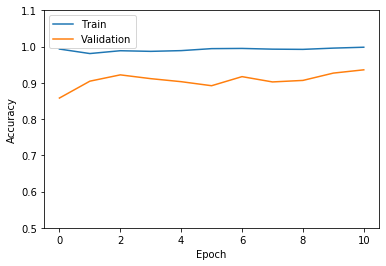

In [58]:
# plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([.5,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("model_gender.png", dpi=300)

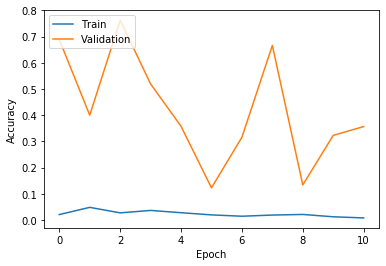

In [64]:
# epochs =13
# epoch_nums = range(1,epochs+1)
# training_loss = history.history["loss"]
# validation_loss = history.history["val_loss"]
# plt.plot(epoch_nums, training_loss)
# plt.plot(epoch_nums, validation_loss)
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['training', 'validation'], loc='upper right')
# plt.show()



# plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
#plt.ylim([.5,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig("model_gender.png", dpi=300)

In [ ]:
128,128, epoch=20,batch size=32
9696